In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
ydata = yf.download('DOW', '2016-01-01', '2019-08-01')

[*********************100%%**********************]  1 of 1 completed


In [4]:
%matplotlib inline

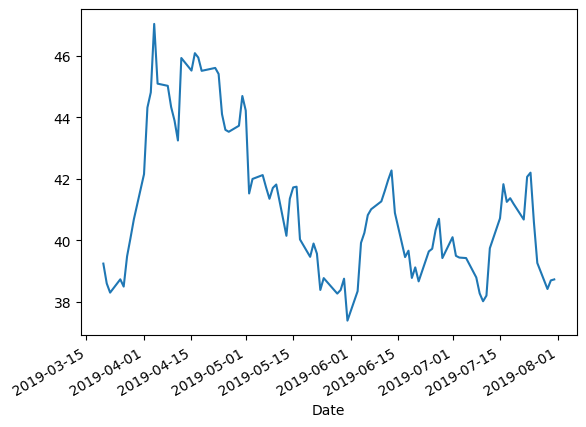

In [6]:
ydata['Adj Close'].plot()
plt.show()

In [7]:
icker_list = ['Dow']

In [9]:
ydata = yf.download(ticker_list, '2015-1-1')['Adj Close']

print(ydata.head())

[*********************100%%**********************]  1 of 1 completed
Date
2019-03-20    39.238815
2019-03-21    38.592701
2019-03-22    38.293285
2019-03-25    38.726646
2019-03-26    38.490269
Name: Adj Close, dtype: float64


In [11]:
ydata.describe()

count    1123.000000
mean       47.483103
std         8.880285
min        18.409840
25%        41.108141
50%        48.889721
75%        54.452044
max        65.409111
Name: Adj Close, dtype: float64

In [2]:
### Collecting Data